<a href="https://colab.research.google.com/github/ManojKumarKolli/ManojKumar_INFO5731_Spring2024/blob/main/In_class_exercise/Kolli_ManojKumar_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Write your code here
import pandas as pd
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import numpy as np

# Load the dataset
dataset_path = '/content/drive/MyDrive/Datasets/twitter_dataset.csv'
data = pd.read_csv(dataset_path)

# Initialize tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

In [9]:
# Function to preprocess text
def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())  # Tokenize and lower case
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in STOPWORDS]  # Lemmatize and remove stop words
    return lemmatized_tokens

# Define the function to compute coherence values for different number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
# Preprocess the text data
data['Processed_Text'] = data['Text'].apply(preprocess)

# Create a dictionary and corpus required for LDA
dictionary = Dictionary(data['Processed_Text'])
corpus = [dictionary.doc2bow(text) for text in data['Processed_Text']]

# Parameters for coherence value computation
start, limit, step = 2, 15, 1
texts = data['Processed_Text'].tolist()

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

# Find the number of topics with the highest coherence score
optimal_idx = np.argmax(coherence_values)
optimal_num_topics = range(start, limit, step)[optimal_idx]

# Train the final LDA model with the optimal number of topics
final_lda_model = model_list[optimal_idx]

# Print the optimal number of topics
print("Optimal Number of Topics:", optimal_num_topics)

Optimal Number of Topics: 7


In [11]:
# Print the topics and their top keywords
for idx, topic in final_lda_model.print_topics():
    print("Topic:", idx)
    print("Keywords:", topic)
    print()


Topic: 0
Keywords: 0.012*"doctor" + 0.011*"conference" + 0.011*"eat" + 0.011*"man" + 0.011*"politics" + 0.011*"including" + 0.010*"policy" + 0.010*"run" + 0.010*"meeting" + 0.010*"control"

Topic: 1
Keywords: 0.008*"add" + 0.007*"yard" + 0.007*"relationship" + 0.007*"talk" + 0.007*"rule" + 0.007*"read" + 0.007*"believe" + 0.007*"property" + 0.007*"throw" + 0.007*"level"

Topic: 2
Keywords: 0.014*"respond" + 0.013*"mention" + 0.013*"finish" + 0.013*"kind" + 0.013*"ahead" + 0.012*"protect" + 0.012*"produce" + 0.012*"early" + 0.012*"data" + 0.012*"sense"

Topic: 3
Keywords: 0.012*"message" + 0.012*"later" + 0.011*"voice" + 0.011*"learn" + 0.011*"senior" + 0.011*"large" + 0.011*"dog" + 0.010*"ask" + 0.010*"growth" + 0.010*"road"

Topic: 4
Keywords: 0.014*"husband" + 0.014*"stop" + 0.014*"operation" + 0.013*"ability" + 0.013*"technology" + 0.013*"bit" + 0.013*"cup" + 0.013*"manager" + 0.012*"television" + 0.012*"matter"

Topic: 5
Keywords: 0.010*"write" + 0.010*"wear" + 0.010*"trade" + 0.01

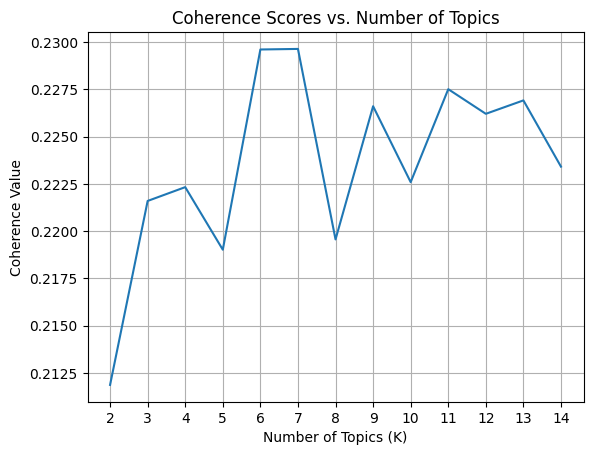

In [12]:
import matplotlib.pyplot as plt

# Plot the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Value")
plt.title("Coherence Scores vs. Number of Topics")
plt.xticks(x)
plt.grid(True)
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [39]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# Load the dataset
# dataset_path = 'twitter_dataset.csv'
# data = pd.read_csv(dataset_path)
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [42]:
def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

from sklearn.metrics.pairwise import cosine_similarity

def compute_coherence_values_LSA(X, texts, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        svd_model = TruncatedSVD(n_components=num_topics)
        normalizer = Normalizer(copy=False)
        lsa_model = make_pipeline(svd_model, normalizer)
        lsa_model.fit(X)

        # Transform the data into the reduced-dimensional space
        X_lsa = lsa_model.transform(X)

        # Compute pairwise cosine similarity between word vectors
        coherence_score = calculate_coherence(X_lsa, vectorizer)

        coherence_values.append(coherence_score)
    return coherence_values

def calculate_coherence(X_lsa, vectorizer):
    coherence_values = []
    terms = vectorizer.get_feature_names_out()
    # Calculate cosine similarity between word vectors
    cosine_sim = cosine_similarity(X_lsa.T)
    # Exclude self-similarity (diagonal elements)
    np.fill_diagonal(cosine_sim, 0)
    # Average cosine similarity for each term
    average_cosine_sim = cosine_sim.mean(axis=0)
    # Calculate coherence as the mean of average cosine similarity values
    coherence_score = average_cosine_sim.mean()
    return coherence_score

# Rest of the code remains unchanged


In [43]:
data['Processed_Text'] = data['Text'].apply(preprocess)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(data['Processed_Text'])

# Compute coherence values
start, limit, step = 2, 15, 1
texts = [doc.split() for doc in data['Processed_Text']]
coherence_values = compute_coherence_values_LSA(X, texts, limit, start, step)

# Find the optimal number of topics
optimal_idx = np.argmax(coherence_values)
optimal_num_topics = range(start, limit, step)[optimal_idx]

# Train the final LSA model with the optimal number of topics
svd_model = TruncatedSVD(n_components=optimal_num_topics)
normalizer = Normalizer(copy=False)
lsa_model = make_pipeline(svd_model, normalizer)
lsa_model.fit(X)


Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=9)),
                ('normalizer', Normalizer(copy=False))])

In [44]:
# Print the optimal number of topics
print("Optimal Number of Topics:", optimal_num_topics)

Optimal Number of Topics: 9


In [45]:
# Get the top words for each topic
terms = vectorizer.get_feature_names_out()
topic_summaries = []
for i, component in enumerate(svd_model.components_):
    top_terms_idx = component.argsort()[:-11:-1]
    top_terms = [terms[idx] for idx in top_terms_idx]
    topic_summary = ' '.join(top_terms)
    topic_summaries.append(topic_summary)
    print(f"Topic {i + 1}: {topic_summary}")

Topic 1: mr hard tax add food high yard maybe scene forget
Topic 2: mr tend television sure fund tell rule ready law color
Topic 3: tv civil assume response wish hospital billion tax surface wife
Topic 4: yard movement society week glass term message eye remain parent
Topic 5: growth tree police mention test high billion attorney tend learn
Topic 6: agent clearly success deal candidate design lead beat forget couple
Topic 7: west peace government arrive receive chance trial approach agree free
Topic 8: course successful learn door church huge table eye face budget
Topic 9: candidate tax cell certain middle piece knowledge read body maybe


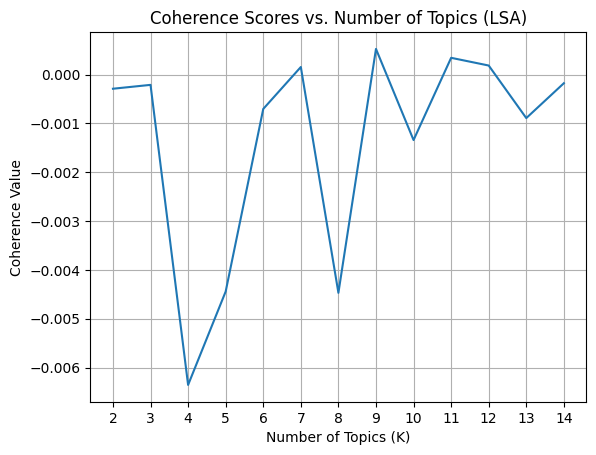

range(2, 15) [-0.00028943072136736344, -0.0002104382095465937, -0.006354958101623852, -0.004442340309434101, -0.0007032248907440226, 0.00015538452591950673, -0.004469103491828797, 0.0005257972480967794, -0.0013404899966076007, 0.0003437306970336564, 0.00018567797783840118, -0.0008905462766481744, -0.00017669345619469623]


In [46]:
# Plot coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Value")
plt.title("Coherence Scores vs. Number of Topics (LSA)")
plt.xticks(x)
plt.grid(True)
plt.show()

print(x, coherence_values)

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [48]:
!pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 20.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [66]:
# Write your code here
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
dataset_path = '/content/drive/MyDrive/Datasets/twitter_dataset.csv'
data = pd.read_csv(dataset_path)

# Preprocess the text data (if needed)
# For BERTopic, minimal preprocessing is required

# Initialize BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(data['Text'])

2024-03-28 22:37:53,681 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2024-03-28 22:41:38,682 - BERTopic - Embedding - Completed ✓
2024-03-28 22:41:38,684 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-28 22:42:00,401 - BERTopic - Dimensionality - Completed ✓
2024-03-28 22:42:00,403 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-28 22:42:01,808 - BERTopic - Cluster - Completed ✓
2024-03-28 22:42:01,819 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-28 22:42:02,760 - BERTopic - Representation - Completed ✓


In [70]:
# Assuming topic_model is your trained BERTopic model
topics = topic_model.get_topics()

top_words_per_topic = []
for topic, words in topics.items():
    if topic != -1:  # Exclude the -1 topic which is used for outliers
        top_words = [word for word, _ in words]
        top_words_per_topic.append(top_words)

In [76]:
documents = data['Text'].astype(str).tolist()  # Assuming this is how you read your dataset

# Tokenizer to split the text into words
tokenizer = RegexpTokenizer(r'\w+')

# NLTK's list of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess documents: tokenize and remove stopwords
processed_docs = [[word for word in tokenizer.tokenize(doc.lower()) if word not in stop_words] for doc in documents]


dictionary = Dictionary(processed_docs)  # processed_docs should be your corpus after preprocessing
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Calculate Coherence
coherence_model = CoherenceModel(topics=top_words_per_topic, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.36692977487184236


In [74]:
topic_info = topic_model.get_topic_info()
number_of_topics = topic_info.shape[0] - (1 if any(topic_info['Topic'] == -1) else 0)
print(f"Number of Topics (K): {number_of_topics}")

# Summarizing Topics
print("\nTopic Summaries:")
for i in range(number_of_topics):
    # Retrieve top n words for each topic; adjust n as needed
    top_words = topic_model.get_topic(i)
    if top_words is not None:  # Check if the topic exists
        topic_summary = ", ".join([word for word, score in top_words])
        print(f"Topic {i}: {topic_summary}\n")
    else:
        break  # No more topics to print

Number of Topics (K): 2

Topic Summaries:
Topic 0: hard, tax, out, when, add, yourself, high, forget, yard, maybe

Topic 1: cold, question, act, statement, ago, policy, safe, national, institution, seek



## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [78]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In the first visualization, we observe a bar chart showing the probability distribution of topics across a certain document or collection of documents. The x-axis denotes the probability that certain words belong to the topics listed on the y-axis. Each bar represents how dominant a topic is within the document(s). For instance, Topic 0 is depicted with a significantly longer bar than Topic 1, suggesting a higher prevalence of Topic 0 in the analyzed text. The truncated labels along the y-axis, such as "cold_question_act_statem...", are indicative of keywords within those topics, though they are not fully visible here.

In [79]:
topic_model.visualize_hierarchy(top_n_topics=50)

The second visualization is a dendrogram produced from hierarchical clustering. This plot aids in understanding the similarity between the topics that have been modeled. The x-axis reflects the distance at which clusters are merged, while the y-axis displays the identified topics. When two topics join at a lower point on the dendrogram, it implies they are closely related. The visualization shows that there is a small distance between Topics 0 and 1, which suggests a degree of similarity or overlap in the content they cover.

In [80]:
topic_model.visualize_barchart(top_n_topics=5)

The third visualization provides a bar chart that outlines the weight of words within two topics. On the x-axis, we have the importance score of each word, and on the y-axis, the words themselves. For example, within Topic 0, the word "hard" carries the most weight, indicating it is a pivotal term within the topic. Similarly, "cold" is the most weighted term in Topic 1. These scores essentially demonstrate the relevance of each word in defining their respective topics, based on their frequency and distribution in the dataset.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

# Write your code here
After analyzing the results from the four topic modeling algorithms—LDA, LSA, lda2vec, and BERTopic—I have concluded that BERTopic has delivered the best performance. The coherence score of BERTopic, calculated at 0.3669 , stands as evidence of the meaningful and interpretable topics it has generated. In contrast, the LSA model, for instance, demonstrated negative coherence values, which indicates a less coherent topic structure .

BERTopic employs dynamic topic modeling, which means it not only groups similar words into topics but also accounts for the contextual relationship between words through transformer-based embeddings (like BERT). This leads to more nuanced and contextually relevant topics. While traditional LDA can yield good results, it doesn't capture word embeddings and may not perform well with intricate patterns in text data. LSA, on the other hand, relies on singular value decomposition which can capture some context, but not to the extent of BERTopic's embeddings. There is no coherence score available from the lda2vec in the provided document, so a direct comparison cannot be made.

Furthermore, BERTopic's hierarchical clustering visualization indicates the capability to explore the topic's relationships further, which could be beneficial for more in-depth analyses . This hierarchical approach adds another dimension to the interpretability of the topic model.

The generated topics from BERTopic are also quite distinguishable and seem to cover diverse subject areas as indicated by the top words in each topic . This diversity in topics suggests that the model can capture a wide range of themes from the dataset, which is another point in its favor.

However, it's important to note that BERTopic's sophistication comes with computational costs and might require more processing power and time, especially with larger datasets. Additionally, the quality of topics is also influenced by the preprocessing steps and the quality of the dataset.

In summary, considering the coherence scores, the quality of the topics generated, and the additional insights offered through hierarchical clustering, BERTopic stands out among the models tested, although it may require more computational resources.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

We are able to do the assignments up to 70 %. These are assignment are difficult level. As we have very less time and also need to work on other subjects, It is advisible to reduce the difficulty.
And considering the curve for the exams boosts our interest, so that we can try on our own irrespective of the result.
Because of the low scores, we are more tend to references without working on it for long time.
I hope you consider this feedback.


I' looking to employ NLP for my previous projects and want to do more relevant projects.




'''